# Jupyter Notebook to develop a Model for accurate prediction of Diabetes through Machine Learning Algorithms

# In our analysis, we will use three Machine Learning Algorithms: Logistic Regression, Naive Bayes and Support Vector

In [1]:
#Importing important modules and library to perform our Data Analysis and Machine Learning Algorithms 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset onto a Pandas Dataframe

dataset = pd.read_csv(r'C:\Users\My PC\Desktop\Medical\diabetes.csv')

# Pre-Emtpive Data Analysis

In [3]:
#The Data will be pre-emptively analyzed to make the best out of it and help us understand the best fit for the algorithms

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


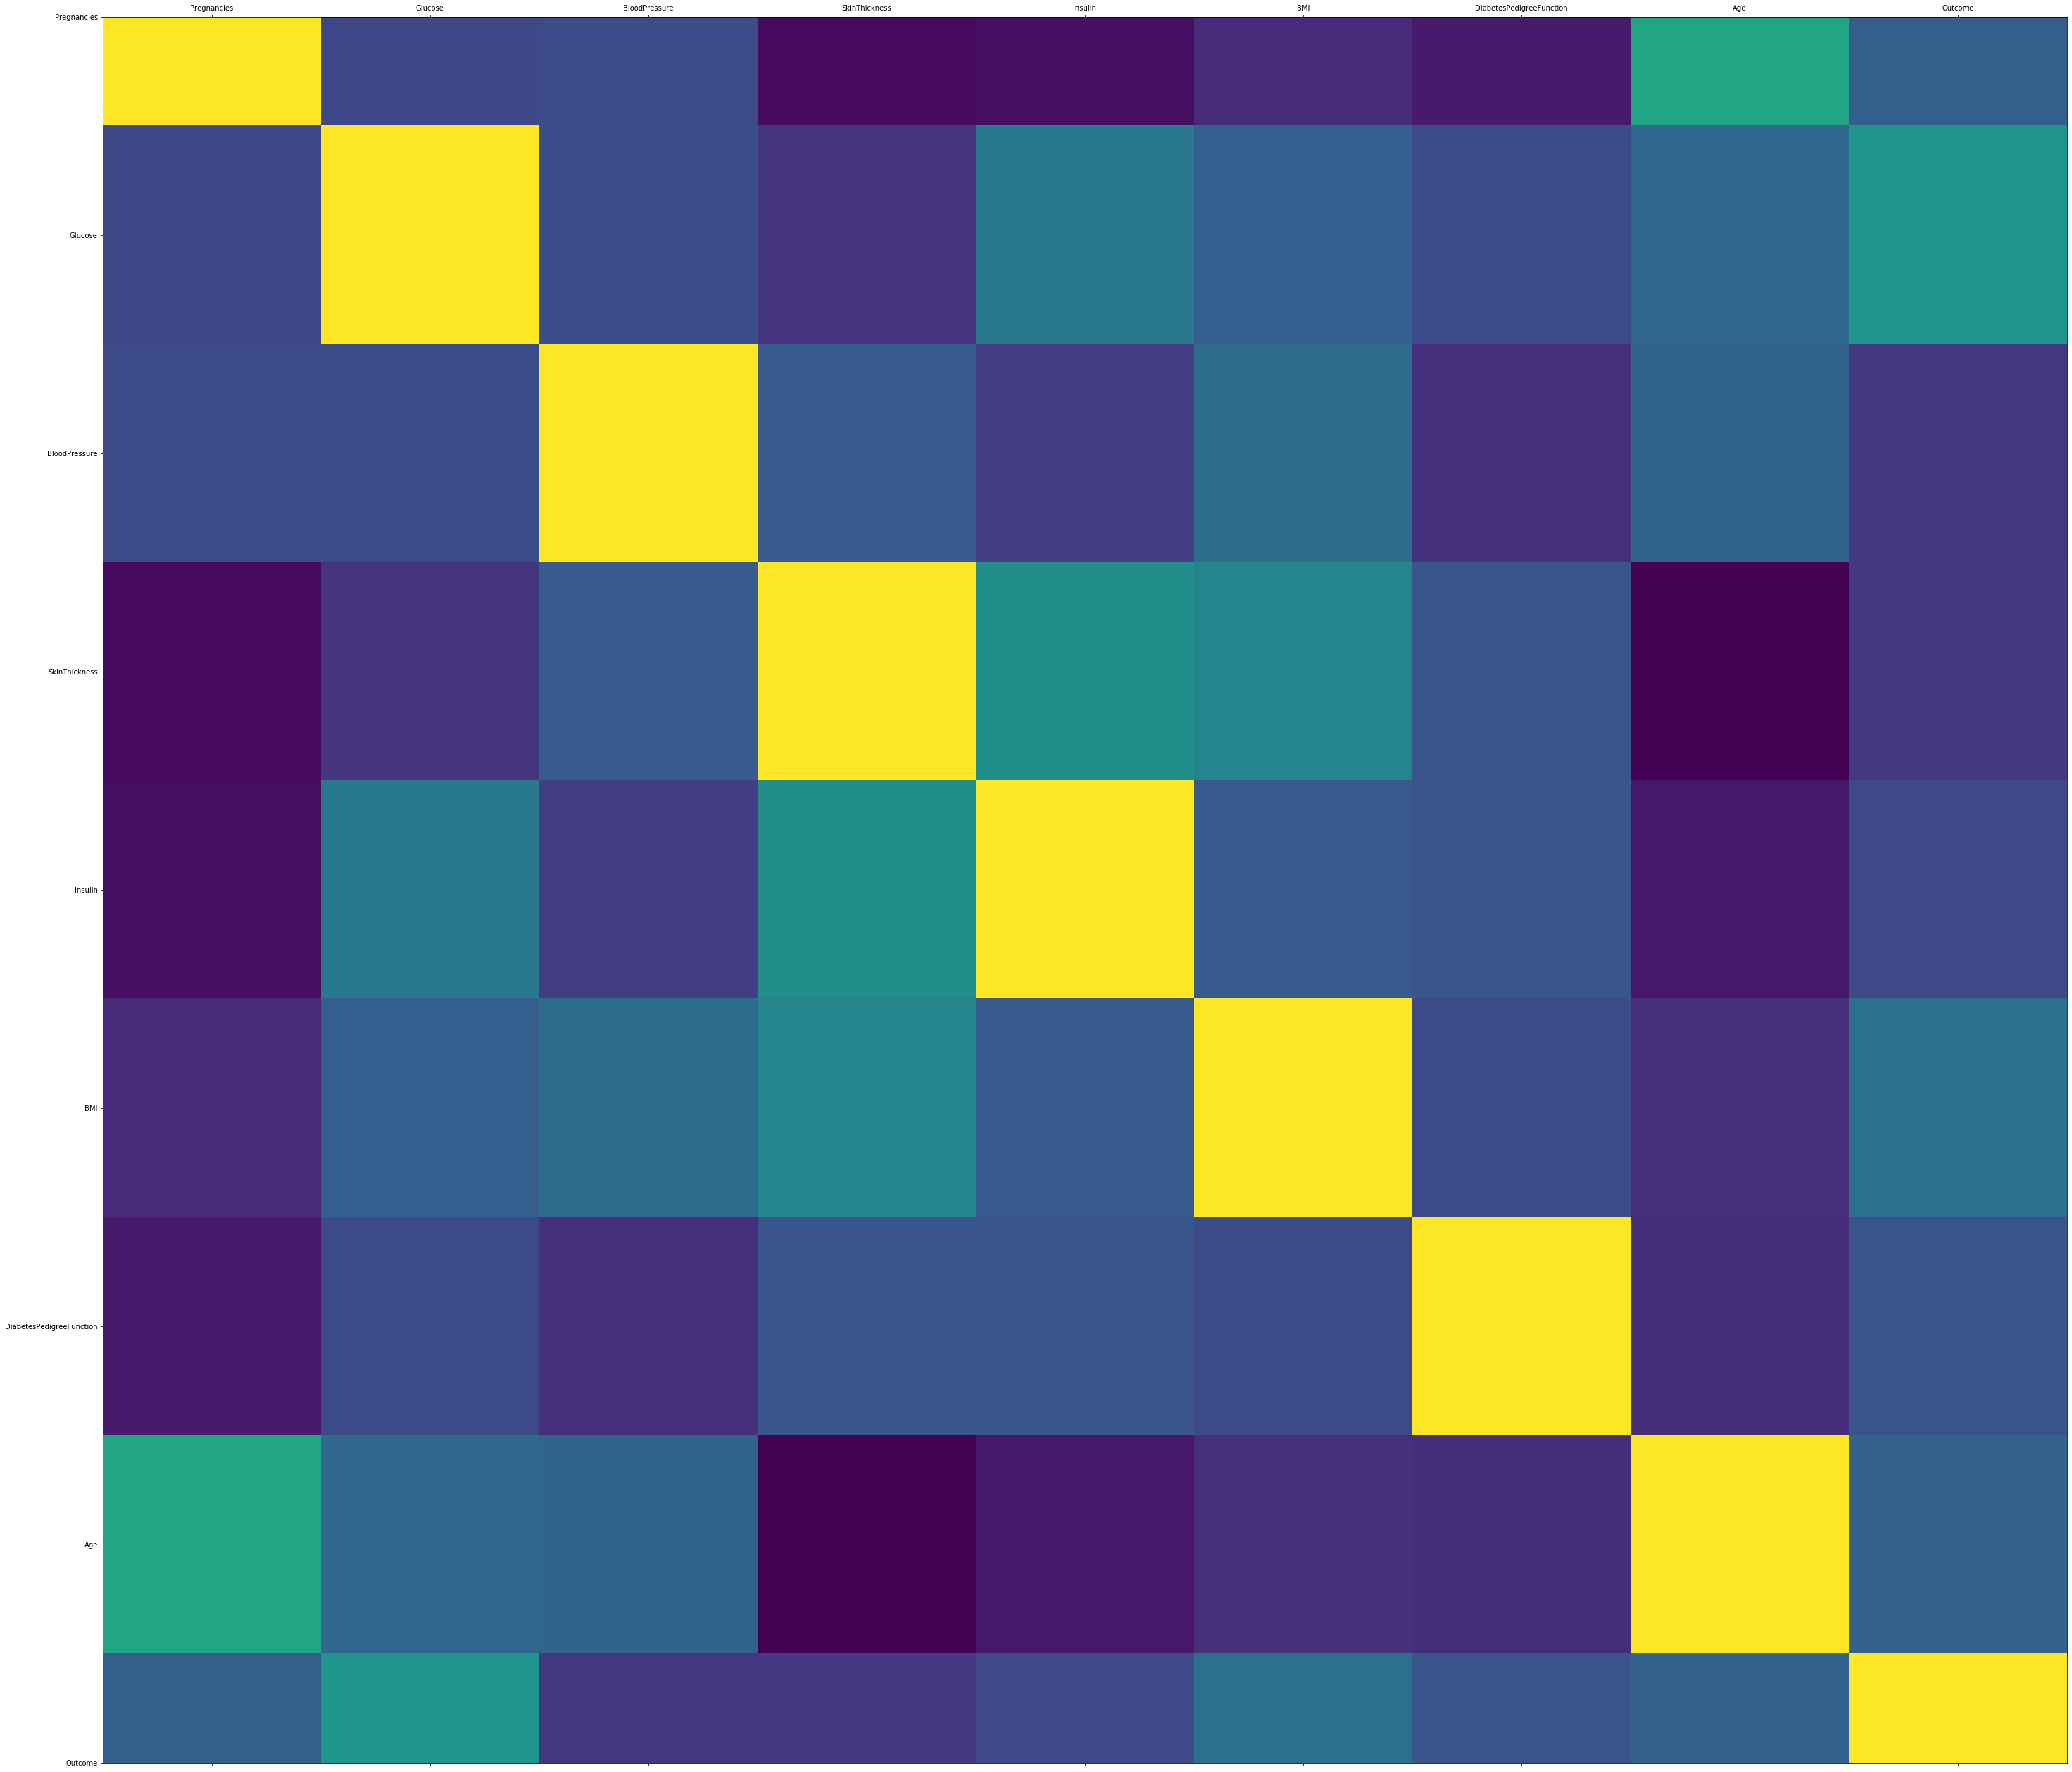

In [6]:
#Showing a Co-Relation between different Data onto our Dataframe

def plot_it(dataframe, size=50):
    corr = dataframe.corr()    # A Dataframe Co-Relation Function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # Color Codes the recangle according to their value
    plt.xticks(range(len(corr.columns)), corr.columns)  
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_it(dataset)

In [7]:
#Here we will map if a person has diabetes or not based on the Outcome Parameter. 0 depicts that a person doesn't have diabetes
#while 1 depicts that the person has diabetes. Let's analyze the data further.

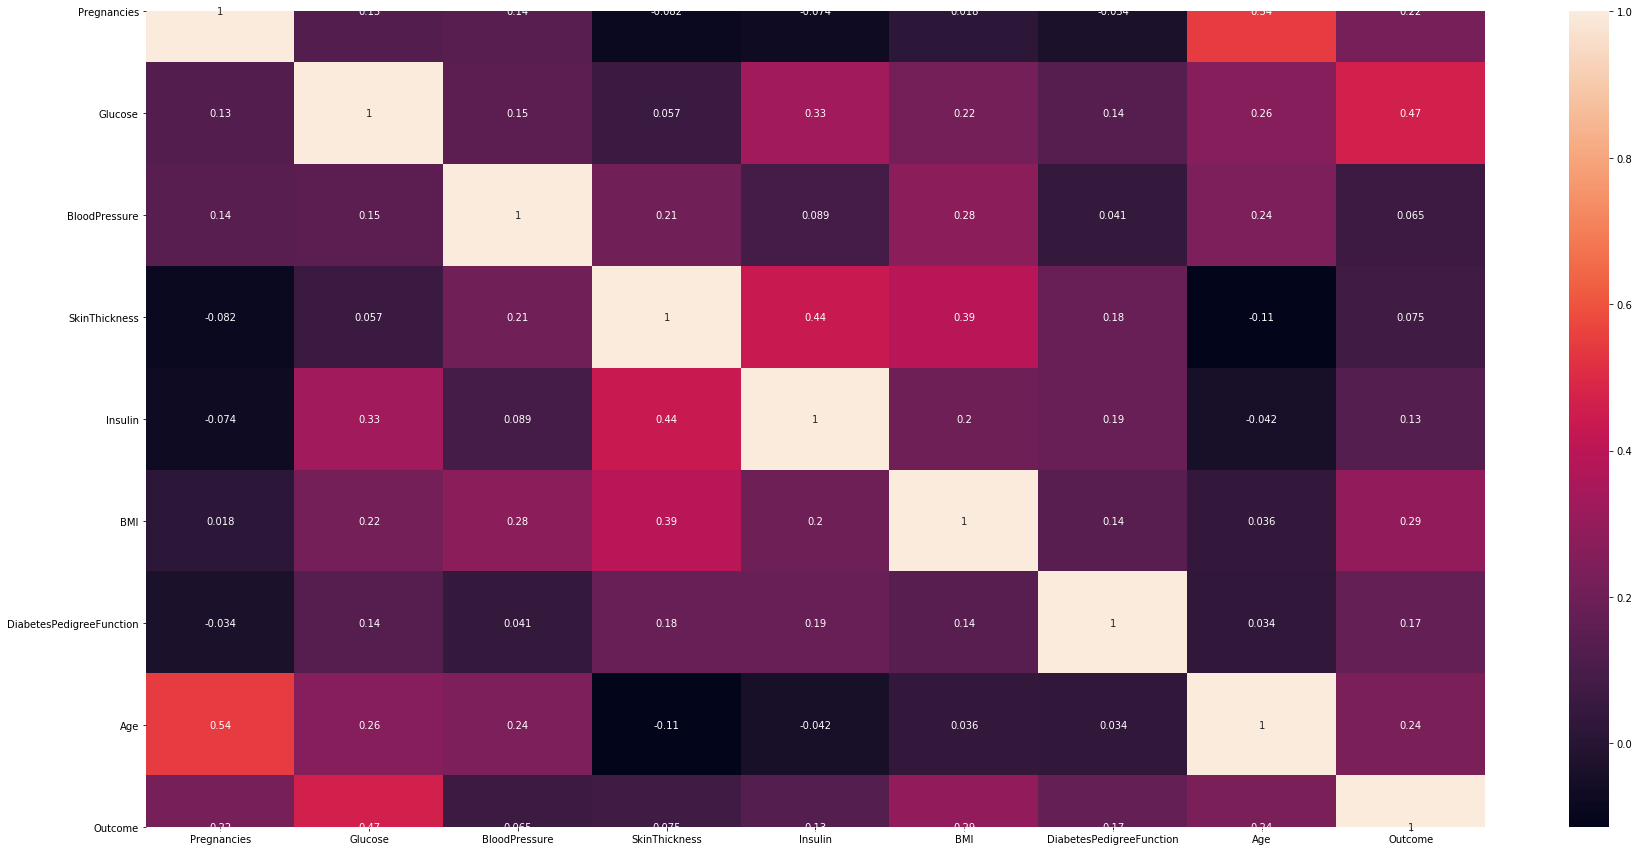

In [8]:
#Lets generate a heat-map to analyze our dataset

plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(), annot=True) 
plt.show()

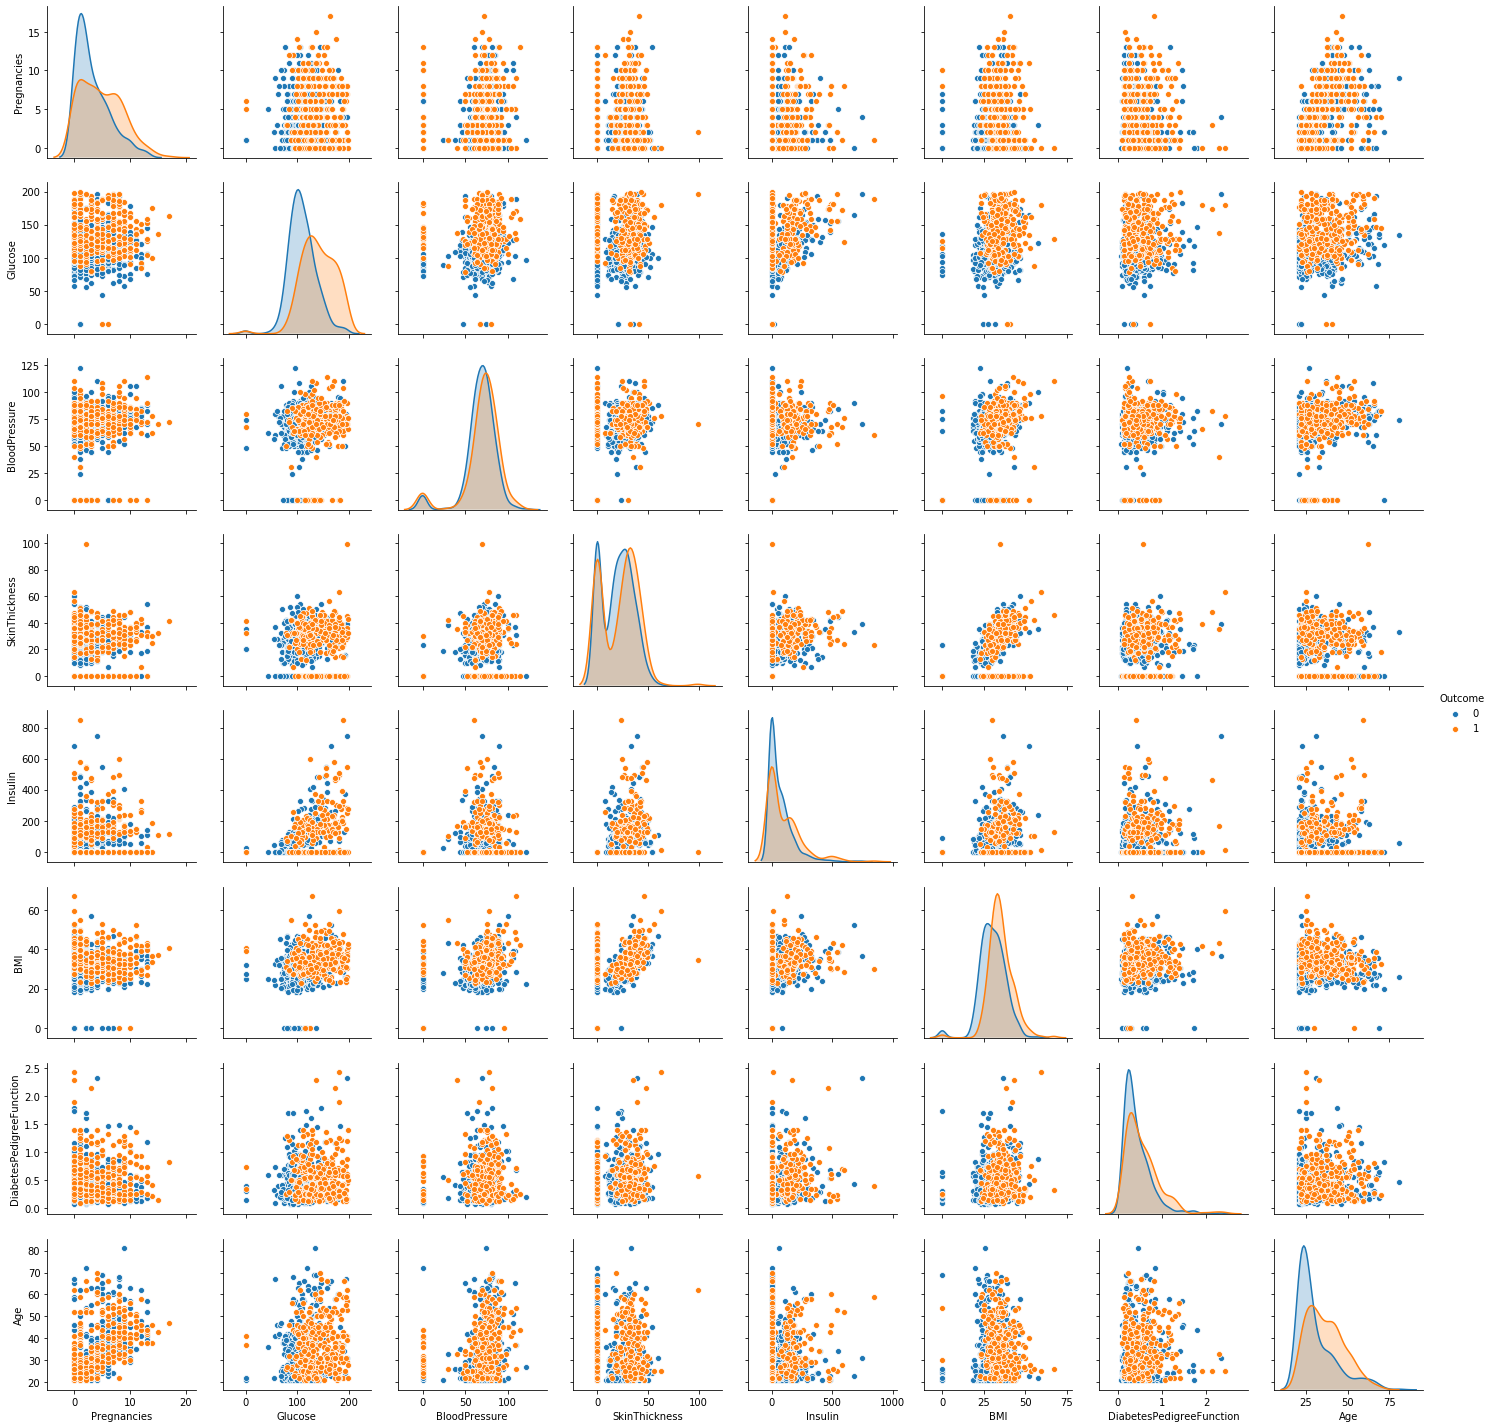

In [9]:
sns.pairplot(dataset, hue='Outcome', vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
plt.show()

In [10]:
print('Columns of our Dataset: \n',dataset.columns)

Columns of our Dataset: 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [11]:
print('Unique Column Count: \n')
for col in dataset:
    print(len(dataset[col].unique()), col)

Unique Column Count: 

17 Pregnancies
136 Glucose
47 BloodPressure
51 SkinThickness
186 Insulin
248 BMI
517 DiabetesPedigreeFunction
52 Age
2 Outcome


In [12]:
dataset.shape

(768, 9)

In [14]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [16]:
#Checking if there are any NULL values in our Dataset

dataset.isnull().values.any()

False

In [17]:
#Thank God, that there is no Null Value in our Dataset. Helps with our Data Analysis!

#Now, let's analyze our Target Value. 1 and 0 are used to show if a patient, has Diabetes or not.

In [18]:
dataset["Outcome"].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [19]:
dataset["Outcome"].unique()

array([1, 0], dtype=int64)

0    500
1    268
Name: Outcome, dtype: int64


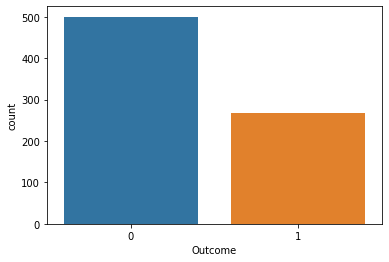

In [20]:
x=dataset["Outcome"]
sns.countplot(x)
our=dataset.Outcome.value_counts()
print(our)

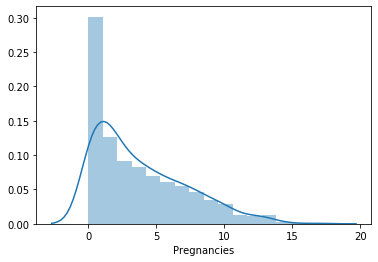

In [22]:
#Let's analyze the different parameters in our Dataframe

sns.distplot(dataset["Pregnancies"])

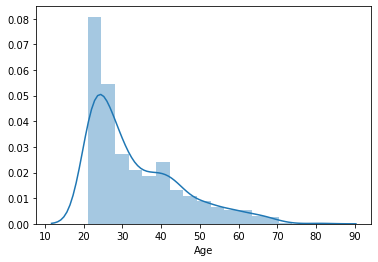

In [23]:
sns.distplot(dataset["Age"])

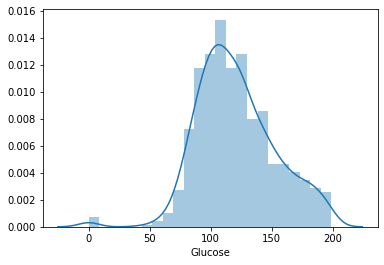

In [24]:
sns.distplot(dataset["Glucose"])

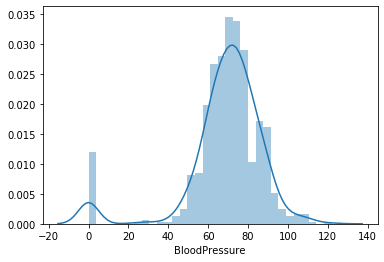

In [25]:
sns.distplot(dataset["BloodPressure"])

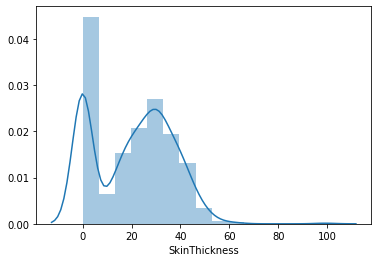

In [26]:
sns.distplot(dataset["SkinThickness"])

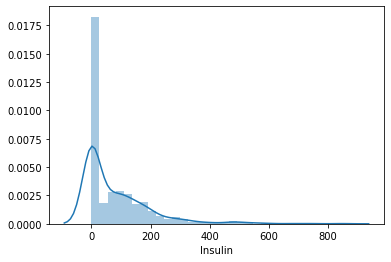

In [27]:
sns.distplot(dataset["Insulin"])

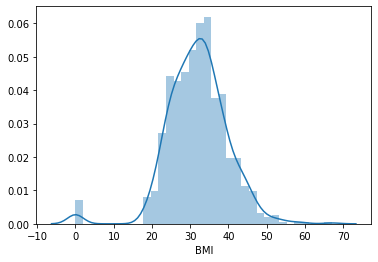

In [28]:
sns.distplot(dataset["BMI"])

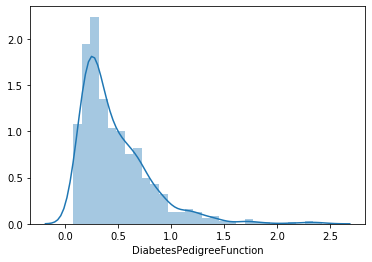

In [29]:
sns.distplot(dataset["DiabetesPedigreeFunction"])

# Data-Set Splitting

In [30]:
from sklearn.model_selection import train_test_split
to_Predict=dataset.drop("Outcome",axis=1)
to_Target=dataset["Outcome"]

In [31]:
#We will split our Dataset into two parts: 70% Data for Training while the rest 30% Data will be used for testing
X_train,X_test,Y_train,Y_test = train_test_split(to_Predict,to_Target,test_size=0.30,random_state=0)

#Hullo! Our Training and Testing Data is prepared!!

# Algorithms Used: Logistic Regression

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
predicted=logistic_regression.predict(X_test)

###########################################################

final_score=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Logistic Regression is %r" %(final_score))

The accuracy of our model implemented through Logistic Regression is 78.355


c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Algorithms Used: Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,Y_train)
predicted=gauss.predict(X_test)

###########################################################

final_score1=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Naive Bayes is %r" %(final_score1))

The accuracy of our model implemented through Naive Bayes is 76.1905


# Algorithms Used: Support Vector

In [47]:
from sklearn import svm
Support_Vector=svm.SVC(kernel="linear")
Support_Vector.fit(X_train,Y_train)
predicted=Support_Vector.predict(X_test)

###########################################################

final_score2=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Support Vector Classification is %r" %(final_score2))

The accuracy of our model implemented through Support Vector Classification is 78.355


# Final Analysis

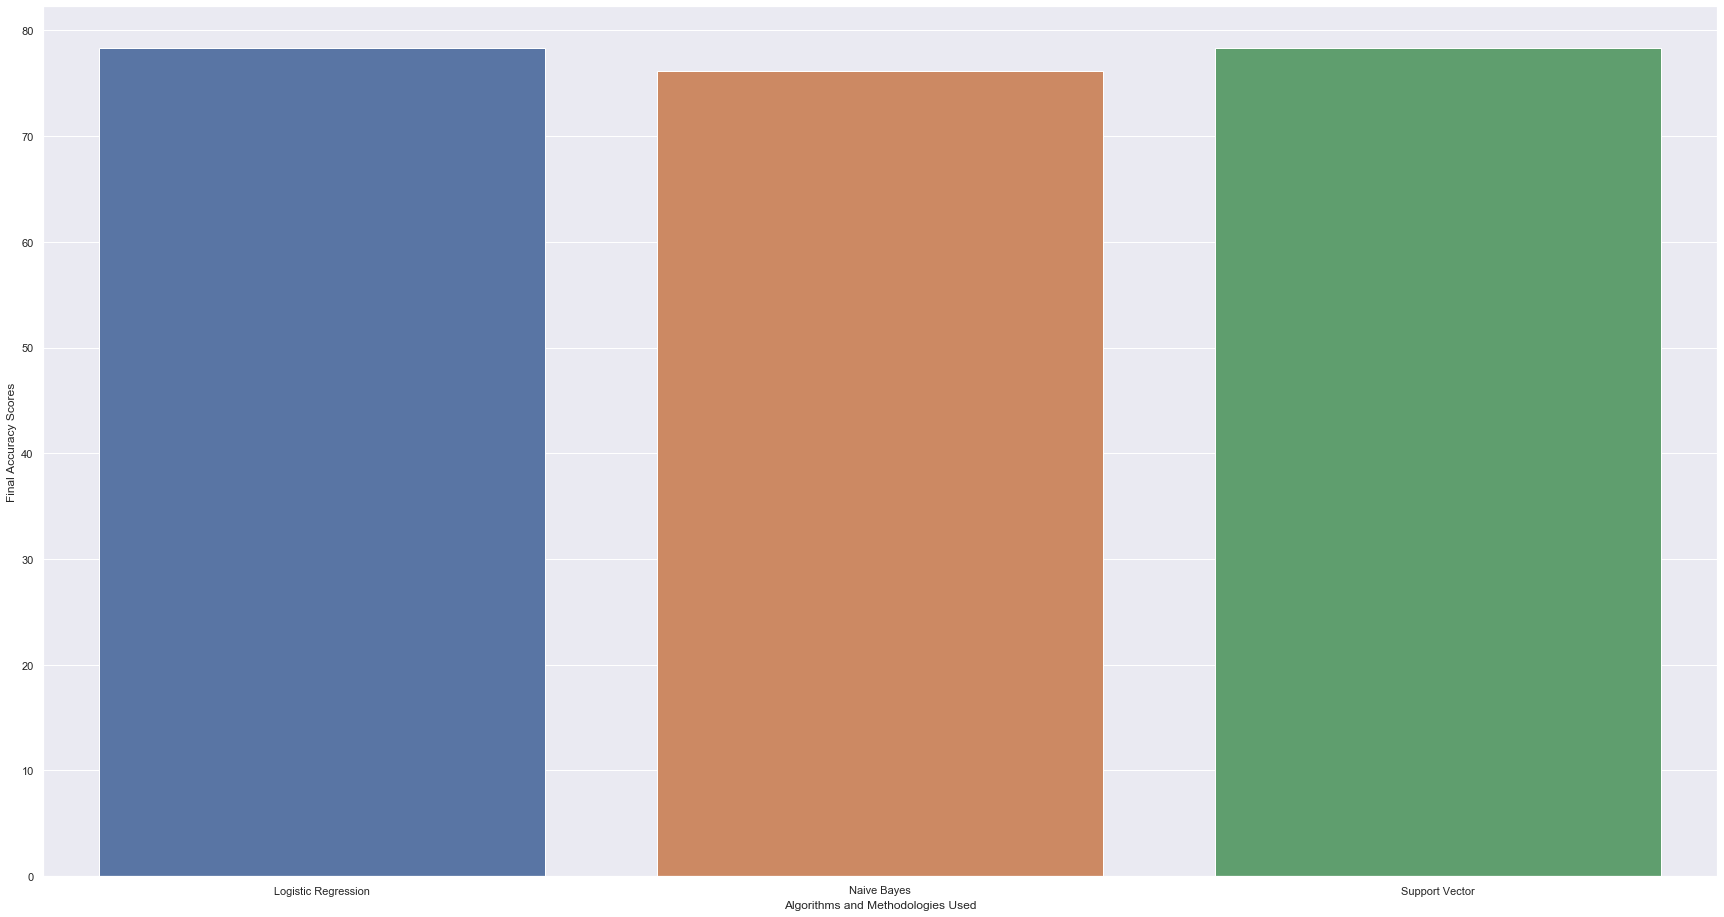

In [48]:
finale=[final_score,final_score1,final_score2]
methods=["Logistic Regression","Naive Bayes","Support Vector"]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final Accuracy Scores")
sns.barplot(methods,finale)

# 78.355% Accuracy is achieved through Logistic Regression and Support Vector. That's a good model that we have implemented.

# Let's print the Confusion Matrix for each of the algorithms

In [37]:
from sklearn.metrics import confusion_matrix
hinata=logistic_regression.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

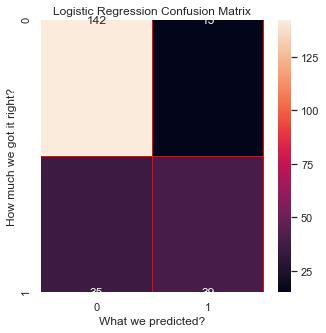

In [38]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

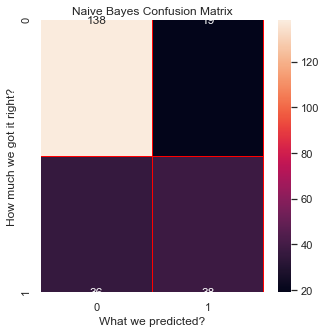

In [39]:
hinata=gauss.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [49]:
hinata=Support_Vector.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

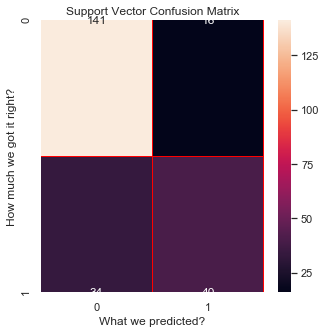

In [50]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Support Vector Confusion Matrix")
plt.show()

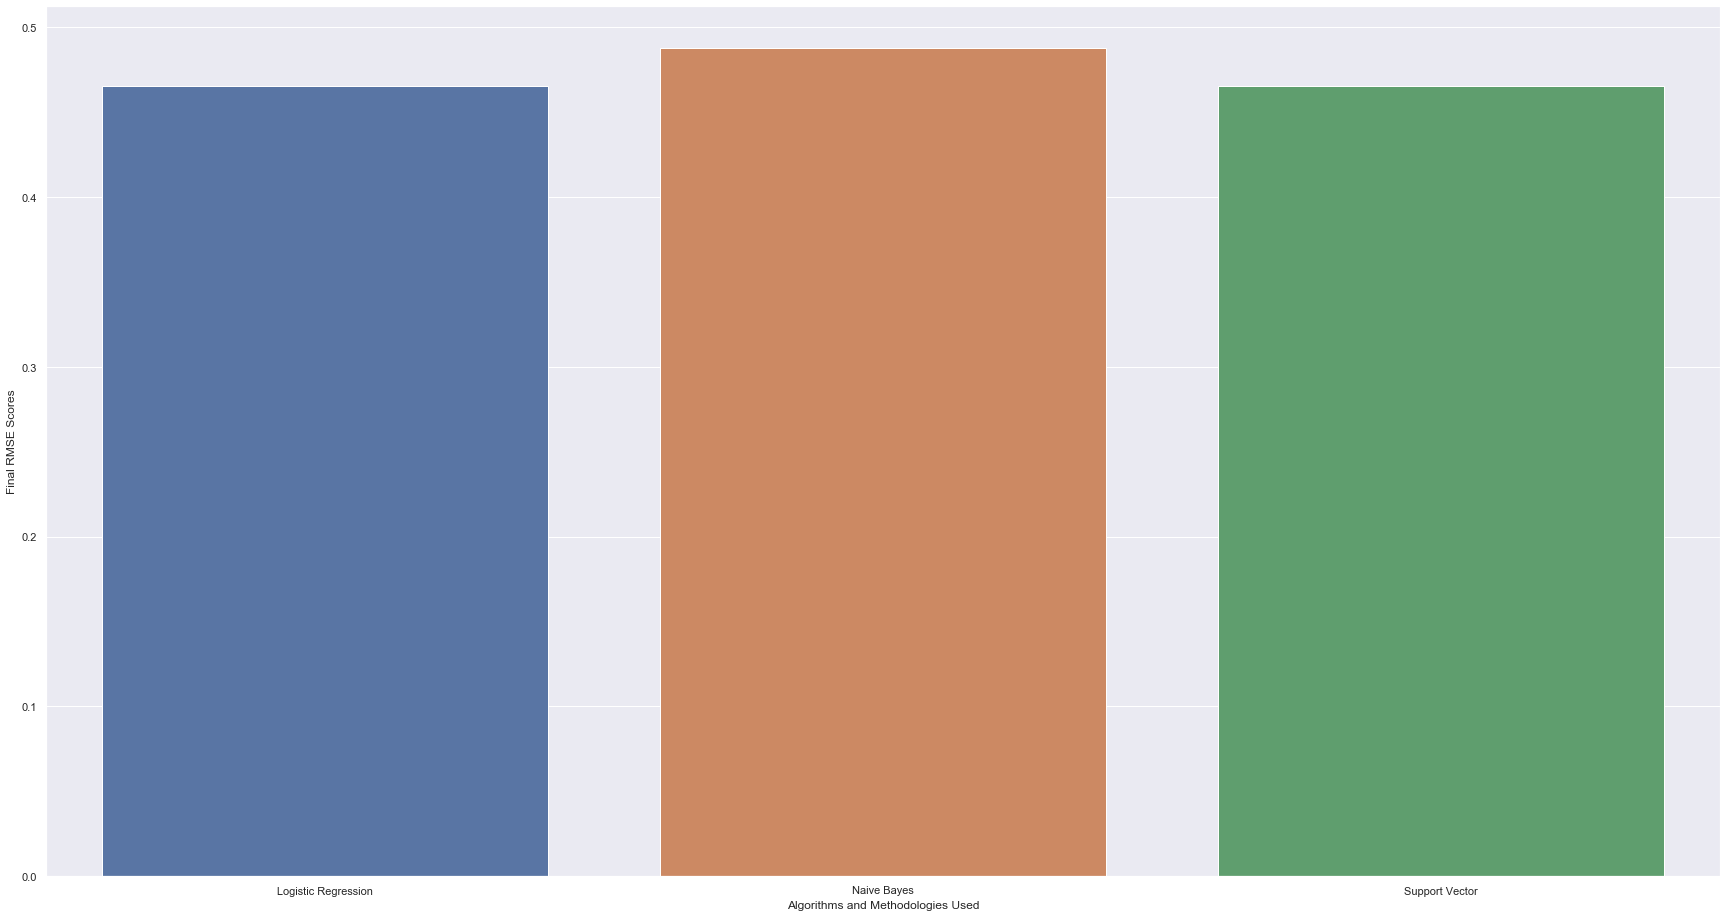

In [51]:
#Calculating Root-Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

Y_pred_lr = logistic_regression.predict(X_test)
Y_pred_rf = gauss.predict(X_test)
Y_pred_svm=Support_Vector.predict(X_test)

rmse_lr = sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_svm= sqrt(mean_squared_error(Y_test, Y_pred_svm))
rmse_gauss = sqrt(mean_squared_error(Y_test, Y_pred_rf))

rmse_scores=[rmse_lr,rmse_gauss,rmse_svm]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final RMSE Scores")
sns.barplot(methods,rmse_scores)